## Programming for Data Analysis - Project 2 ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

### Introduction ###

### Data-cleansing ###

To begin, I will download the libraries I will use in this project. I will use pandas to create the dataframes which I will use to analyse the historical climate data:

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss 

I have downloaded multiple climate related datasets online. These datasets were as follows:

- Atmospheric **carbon dioxide** concentratons from a report by the Intergovernmental Panel on Climate Change (IPCC); most recent year in dataset is 2001.

- Atmospheric **carbon dioxide** concentrations from a 2008 paper in Nature by Luthi et al; most recent year in dataset is 1870 (137 years prior to 2007).

- Atmospheric **carbon dioxide** data from the Mauna Loa Observatory in Hawaii, providing annual data from 1959 to 2022, when precise measurements of atmospheric carbon dioxide first began to be taken. Previously, the analyser tool worked using infrared absorption, but since 2019 it has worked on the basis of a technique called 'Cavity Ring-Down Spectroscopy'. Measurements are assured to be reflective of the true composition of the global atmosophere, due to the location of the observatory and the rigour with which measurements are calibrated and independently verified.

- **Temperature** estimates going back over 820,000 years based on the EPICA Dome C Ice Core Deuterium Data. EPICA stands for European Project for Ice Coring in Antarctica. It estimates past temperature using deuterium as a proxy. Deuterium is a heavy form of hydrogen (containing a neutron in addition to the one proton found in "light" hydrogen). In colder periods, there tends to be less deuterium in ice cores than in warmer periods. The reason for this is that during warm periods, more of the lighter form of hydrogen is evaporated away from the surface of the ocean, so that when the moist air moves northwards to the poles, it contains a higher ratio of heavy hydrogen than it contains during cold periods; precipitation then contains more of this heavy hydrogen and this ultimately shows up in the ice cores. I will refer to this dataset as the "Jouzel" dataset for convenience (Jean Jouzel is a leading glaciologist and climatologist who is one of the creators of the dataset).

- Global **temperature anomoly** data from the National Oceanic and Atmospheric Administration (NOAA). Measurements for the anomoly are taken from 1850 to 2022 and are calculated against the average temperature for the period 1901 to 2000 and are measured in degrees celsius.

- Antarctic **temperature anomoly** data from the National Oceanic and Atmospheric Administration (NOAA). Measurements for the anomoly are taken from 1850 to 2022 and are calculated against the average temperature for the period 1910 to 2000 and are measured in degrees celsius.

With the exception of the Mauna Loa dataset, these datasets were not in csv format initially. To make it easier to create dataframes using pandas, I saved all my source files as csv files in my working directory. I will edit the dataframes using python before I analyse the data; this will include renaming column headings to make them easier to work with. I will also add extra columns to datasets to standardise the figures for time measurement and have the oldest years listed first, so my plots print from oldest years at the left to most recent years at the right.

Firstly, I will load up and amend the IPCC CO2 dataset:

In [43]:
df_co2_ipcc = pd.read_csv("CO2_ipcc_csv.csv")

# rename column names of existing dataframe (setting 'inplace' parameter equal to 'True')
df_co2_ipcc.rename(columns={'Gasage (yr BP) ': 'Year before 1950', 'CO2 (ppmv)': 'CO2', 'sigma mean CO2 (ppmv)': 'sigma mean CO2'}, inplace=True) 

# here I am adding a new column called 'Years' to standardise the time measurements across different datasets.
# I am adding 73 years to every value in the 'years before 1950' column to effectively convert the column to 'years before 2023'. 
# I am then multiplying each year by minus 1, so that the column represents years "in the past"
df_co2_ipcc['Years'] = (df_co2_ipcc['Year before 1950'] + 73) * -1

# reversing the order of the dataset, to for the older years to appear on the left-hand side of the x-axis
df_co2_ipcc = df_co2_ipcc[::-1]

print(df_co2_ipcc)

      Year before 1950     CO2  sigma mean CO2      Years
1900         805668.87  207.29            2.20 -805741.87
1899         805132.44  202.23            0.69 -805205.44
1898         804522.67  204.86            1.64 -804595.67
1897         804009.87  207.50            0.92 -804082.87
1896         803925.28  202.92            2.06 -803998.28
...                ...     ...             ...        ...
4               -43.08  353.95            0.04     -29.92
3               -44.41  357.11            0.16     -28.59
2               -46.28  359.65            0.10     -26.72
1               -48.00  361.78            0.37     -25.00
0               -51.03  368.02            0.06     -21.97

[1901 rows x 4 columns]


Next, I will load up and amend the 2008 Nature paper dataset:

In [44]:
df_co2_nature = pd.read_csv("CO2_nature_csv.csv")

df_co2_nature.rename(columns={'EDC3_gas_a (yr)': 'Years ago', 'CO2 (ppmv)': 'CO2'}, inplace=True)

# Since the paper was written in 2007 and the most recent year in the associated dataset is 137 year prior, I have added 16
# years to the figure for "years ago" when creating the new column 'Years'
df_co2_nature['Years'] = (df_co2_nature['Years ago'] + 16) * -1

df_co2_nature = df_co2_nature[::-1]

print(df_co2_nature)

      Years ago    CO2   Years
1095     798512  191.0 -798528
1094     797099  188.4 -797115
1093     796467  189.3 -796483
1092     795202  195.2 -795218
1091     794608  199.4 -794624
...         ...    ...     ...
4           404  281.9    -420
3           395  279.1    -411
2           279  277.9    -295
1           268  274.9    -284
0           137  280.4    -153

[1096 rows x 3 columns]


Next I will load up the relatively small dataset from Mauna Loa, containing data for atmospheric CO2 levels:

In [45]:
df_mauna_loa_csv = pd.read_csv("mauna_loa_csv.csv")

# I will rename the columns to standardise the heading for the CO2 data:
df_mauna_loa_csv.rename(columns={'year': 'year', 'mean': 'CO2', 'unc':'unc'}, inplace=True)

# I will create a new column called 'Years', to standardise the measurement of time across the datasets.
# I don't need to reverse the rows in this dataset since the earliest year is already in the first row.
df_mauna_loa_csv['Years'] = (2023 - df_mauna_loa_csv['year']) * -1

print(df_mauna_loa_csv)

    year     CO2   unc  Years
0   1959  315.98  0.12    -64
1   1960  316.91  0.12    -63
2   1961  317.64  0.12    -62
3   1962  318.45  0.12    -61
4   1963  318.99  0.12    -60
..   ...     ...   ...    ...
59  2018  408.72  0.12     -5
60  2019  411.65  0.12     -4
61  2020  414.21  0.12     -3
62  2021  416.41  0.12     -2
63  2022  418.53  0.12     -1

[64 rows x 4 columns]


Next, the "Jouzel" temperature data inferred from deuterium levels in ice cores from EPICA Dome C:

In [46]:
df_temp_jouzel_csv = pd.read_csv("temp_jouzel_csv.csv")

df_temp_jouzel_csv.rename(columns={'bag': 'bag', 'ztop': 'depth', 'EDC3béta': 'Years before 1950', 'AICC2012': 'year_new', 'deutfinal': 'deuterium', 'temp': 'temp_Kelvin', 'acc-EDC3beta' : 'acc-EDC3beta'}, inplace=True)

# adding a new column called 'Years' to standardise the measurement of time across datasets. 
# this represents the number of years ago the data relates to eg. -55 relates to (-55 + 73 = 18 years ago, or the year 2005)
# The negative figure allows for my graph to print from oldest date to most recent
df_temp_jouzel_csv['Years'] = (df_temp_jouzel_csv['year_new'] + 73) * -1

# adding a new column called 'temp_Celsius' as I am more familiar with this unit of measurement for temperature
df_temp_jouzel_csv['temp_Celsius'] = (df_temp_jouzel_csv['temp_Kelvin'] - 273.15)

df_temp_jouzel_csv = df_temp_jouzel_csv[::-1]

print(df_temp_jouzel_csv)

       bag    depth  Years before 1950       year_new  deuterium  temp_Kelvin  \
5818  5819  3199.90       820093.90000  821838.000000     -430.0        211.4   
5817  5818  3199.35       819303.10000  820769.000000     -429.8        211.4   
5816  5817  3198.80       818505.50000  819700.000000     -430.3        211.3   
5815  5816  3198.25       817693.60000  818631.000000     -431.4        211.2   
5814  5815  3197.70       816871.60000  817562.000000     -432.2        211.0   
...    ...      ...                ...            ...        ...          ...   
4        5     2.20          -24.55278     -34.516667        NaN        218.3   
3        4     1.65          -31.64156     -41.540000        NaN        218.3   
2        3     1.10          -37.44019     -46.026667        NaN        218.3   
1        2     0.55          -43.55977     -50.513333        NaN        218.3   
0        1     0.00          -50.00000     -55.000000        NaN        218.3   

      acc-EDC3beta         

I will now load up the dataset for the Antarctic temperature anomaly and create new column which standardises the data for the year to allow for easier comparison with other datasets:

In [47]:
df_antarctic_temp_anomaly_1850 = pd.read_csv("antarctic_temp_anomaly_csv.csv")

# renaming columns to standardise across datasets when combining later on
df_antarctic_temp_anomaly_1850.rename(columns={'Year': 'year', 'Anomaly': 'anomaly'}, inplace=True)

# adding a new column called 'Years' to standardise the measurement of time across datasets. 
# this represents the number of years ago the data relates to eg. - 1 is 1 year ago ie. 2022
df_antarctic_temp_anomaly_1850['Years'] = (df_antarctic_temp_anomaly_1850['year'] - 2023)

print(df_antarctic_temp_anomaly_1850)


     year  anomaly  Years
0    1850    -0.08   -173
1    1851    -0.10   -172
2    1852    -0.05   -171
3    1853    -0.08   -170
4    1854    -0.08   -169
..    ...      ...    ...
168  2018     0.41     -5
169  2019     0.34     -4
170  2020     0.35     -3
171  2021     0.00     -2
172  2022     0.38     -1

[173 rows x 3 columns]


I will also upload the data for Global temperature anomoly from 1850 to 2022, and add a column for 'years ago' as I did for the antarctic temperature anomaly data:

In [48]:
df_global_temp_anomaly_1850 = pd.read_csv("global_temp_anomaly_csv.csv")

# renaming columns to standardise across datasets when combining later on
df_global_temp_anomaly_1850.rename(columns={'Year': 'year', 'Anomaly': 'anomaly'}, inplace=True)

# adding a new column called 'Years' to standardise the measurement of time across datasets. 
# this represents the number of years ago the data relates to eg. - 1 is 1 year ago ie. 2022
df_global_temp_anomaly_1850['Years'] = (df_global_temp_anomaly_1850['year'] - 2023)

print(df_global_temp_anomaly_1850)

     year  anomaly  Years
0    1850    -0.16   -173
1    1851    -0.08   -172
2    1852    -0.09   -171
3    1853    -0.10   -170
4    1854    -0.10   -169
..    ...      ...    ...
168  2018     0.86     -5
169  2019     0.98     -4
170  2020     1.01     -3
171  2021     0.86     -2
172  2022     0.91     -1

[173 rows x 3 columns]


#### Plots of datasets ####

*IPCC data:*

<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years - IPCC data'}, xlabel='Years', ylabel='CO2'>

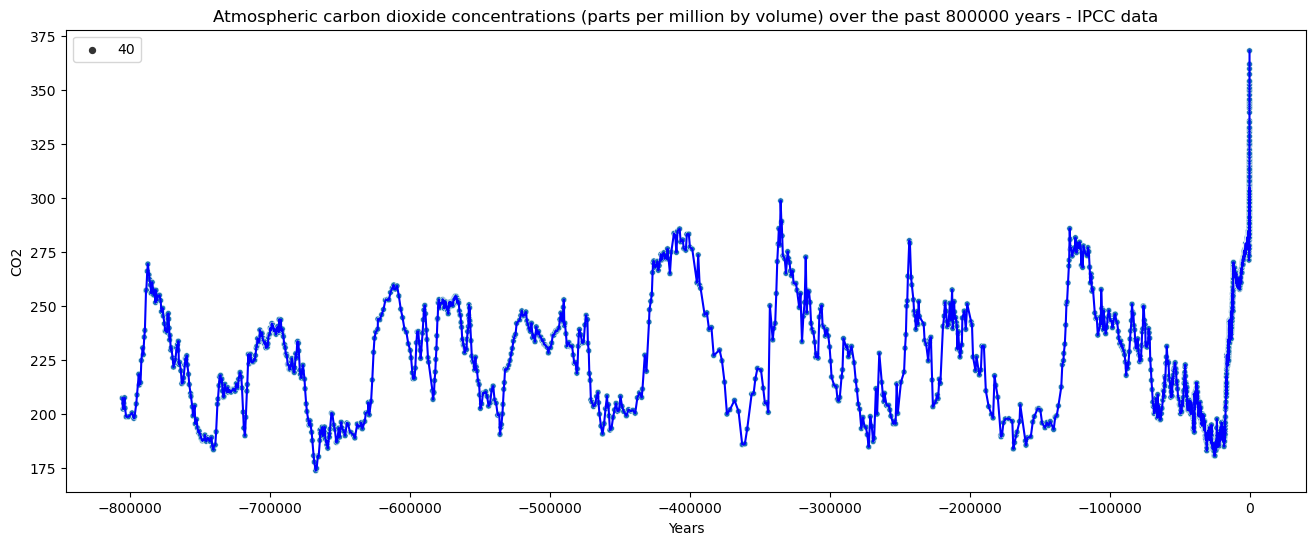

In [49]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years - IPCC data')

sns.scatterplot(x ='Years', y = 'CO2', data = df_co2_ipcc, size = 40)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x ='Years', y = 'CO2', data = df_co2_ipcc, color = 'blue')

*Nature data:*

<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years - Nature data'}, xlabel='Years', ylabel='CO2'>

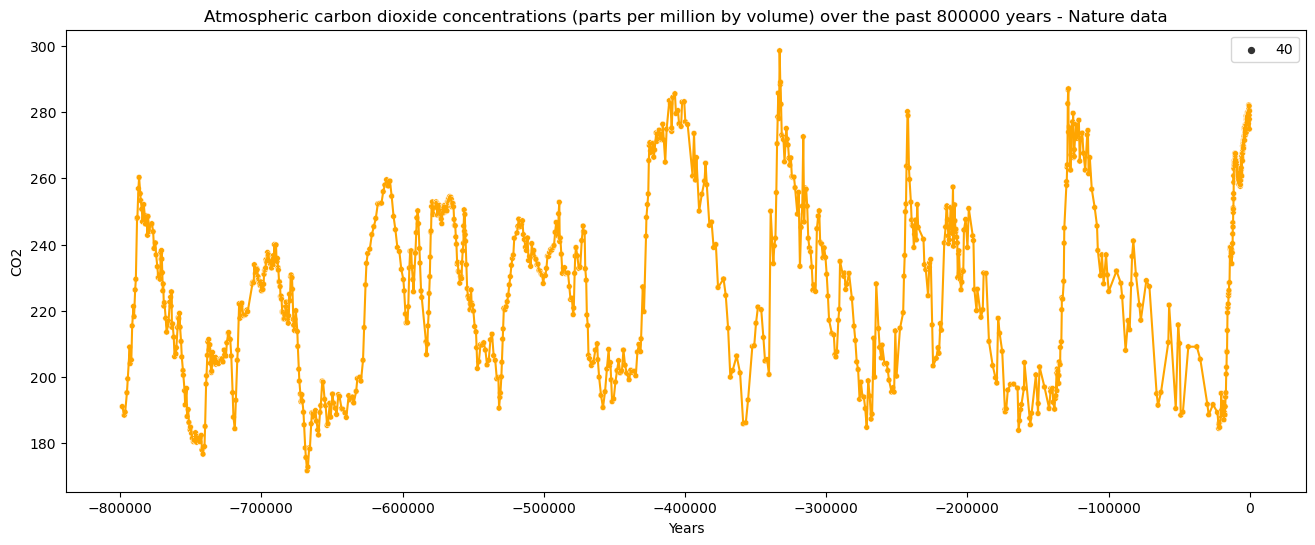

In [50]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years - Nature data')

sns.scatterplot(x='Years', y='CO2', data=df_co2_nature, color = 'orange', size = 40)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x = 'Years', y = 'CO2', data = df_co2_nature, color = 'orange')


*Mauna Loa:*

<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) since 1959 - Mauna Loa data'}, xlabel='year', ylabel='CO2'>

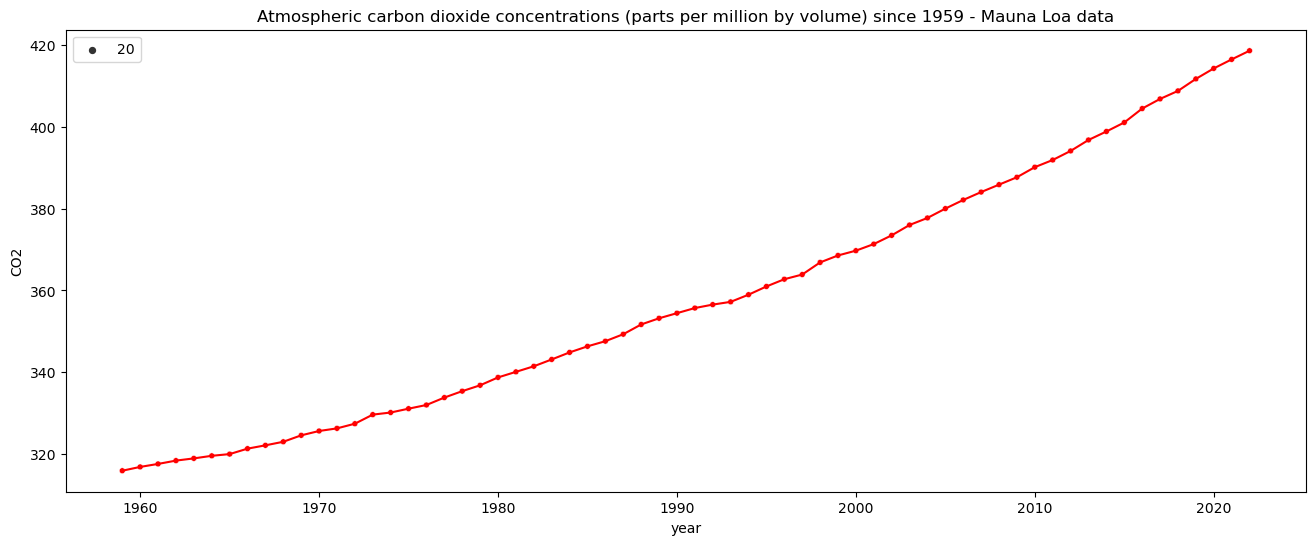

In [51]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) since 1959 - Mauna Loa data')

# Here I will plot using the column 'year' as opposed to 'Years', as the graph for recent data is easier to comprehend 
# when the x-axis is labelled by calendar year rather than how many years ago the year was
# We use the 'size' parameter to decrease size of markers 
sns.scatterplot(x = 'year', y = 'CO2', data=df_mauna_loa_csv, color = 'red', size = 20)      

sns.lineplot(x = 'year', y = 'CO2', data = df_mauna_loa_csv, color = 'red')

*Jouzel data:*

<Axes: title={'center': 'Temperature estimates for past 820000 years inferred from deuterium measurements in EPICA Dome C ice cores'}, xlabel='Years', ylabel='Temperature (°C)'>

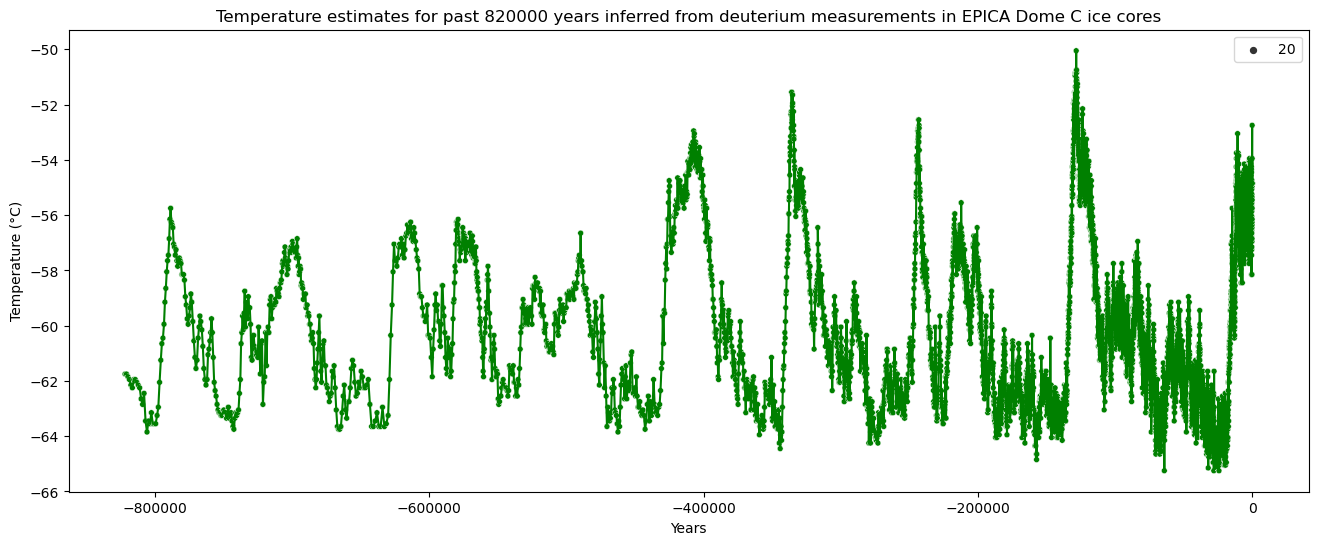

In [52]:
plt.figure(figsize= (16,6))
plt.title('Temperature estimates for past 820000 years inferred from deuterium measurements in EPICA Dome C ice cores')
plt.xlabel('Years')
plt.ylabel('Temperature (°C)')

sns.scatterplot(x = 'Years', y = 'temp_Celsius', data=df_temp_jouzel_csv, color = 'green', size = 20)      

sns.lineplot(x = 'Years', y = 'temp_Celsius', data = df_temp_jouzel_csv, color = 'green')


#### Comparison of C02 datasets ####

To get a sense of the extent to which carbon dioxide levels may have increased in recent years compared to the long-term historical trends, I would ideally have a dataset which contains carbon-dioxide data from the distant past right up to the present day. 

Fortunately, I can obtain this by combining the data from the IPCC dataset with the more recent data from the Mauna Loa dataset. 

Firstly, I want give myself some confidence that the long-term historical data in the IPCC dataset is valid; to do this, I will compare it with the 2008 Nature dataset by creating plot a lineplot for each dataset on the same graph:

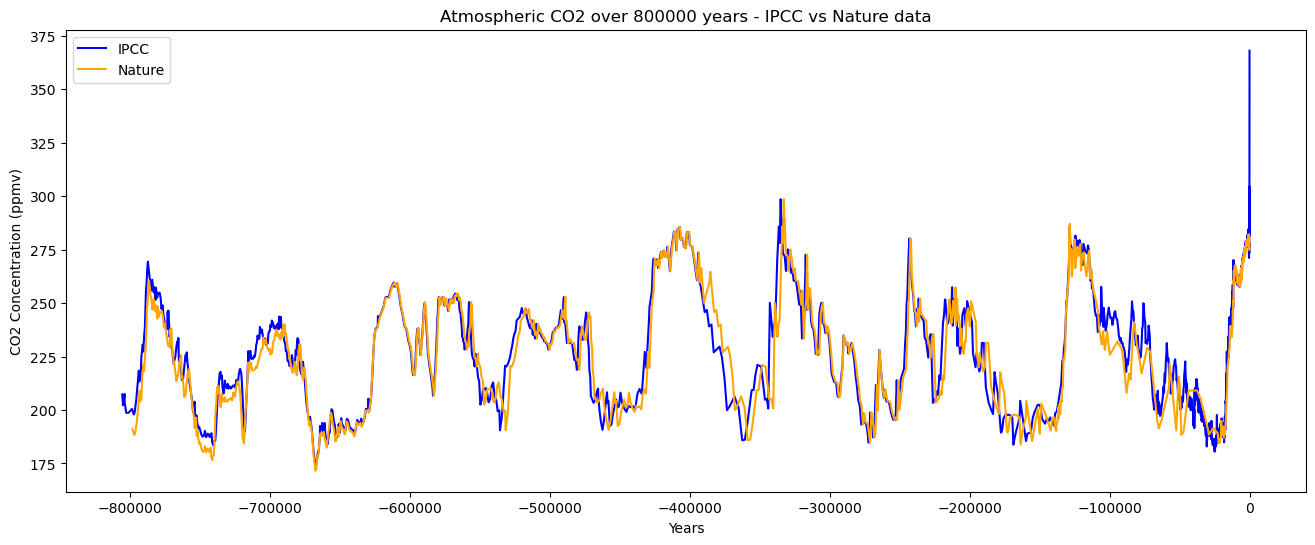

<Figure size 640x480 with 0 Axes>

In [53]:
plt.figure(figsize= (16,6))

sns.lineplot(x='Years', y='CO2', data=df_co2_ipcc, color = 'blue', label='IPCC')
sns.lineplot(x='Years', y='CO2', data=df_co2_nature, color = 'orange', label='Nature')

plt.title('Atmospheric CO2 over 800000 years - IPCC vs Nature data')
plt.xlabel('Years')
plt.ylabel('CO2 Concentration (ppmv)')

plt.legend()

plt.show()

plt.savefig('C02_IPCC_vs_Nature.png')

We see that the datasets are largely in agreement with one another. The Nature data ends in 1870, while the IPCC data continues on to 2001, and the large spike in carbon dioxide levels seen on the right hand-side of the graph relates to these additional years present in the IPCC data.

We can also plot the most recent carbon dioxide data from the IPCC dataset with it's counterpart data from the Mauna Loa dataset:

In [54]:
# create a new sub-dataframe from the IPCC dataframe containing only rows relating to 1959 onwards 
#(ie. up to last data point of 2001)
df_co2_ipcc_1959_to_2001 = df_co2_ipcc.loc[df_co2_ipcc['Years'] >= -64]

# create a new sub-dataframe from the IPCC dataframe containing only rows relating to 2001 backwards 
# (ie. back to first data point of 1959)
df_mauna_loa_1959_to_2001 = df_mauna_loa_csv.loc[df_mauna_loa_csv['Years'] <= -22]

#print(df_co2_ipcc_1959_to_2001)

#print(df_mauna_loa_1959_to_2001)

Now we can plot the data from these two sub-dataframes against each other:

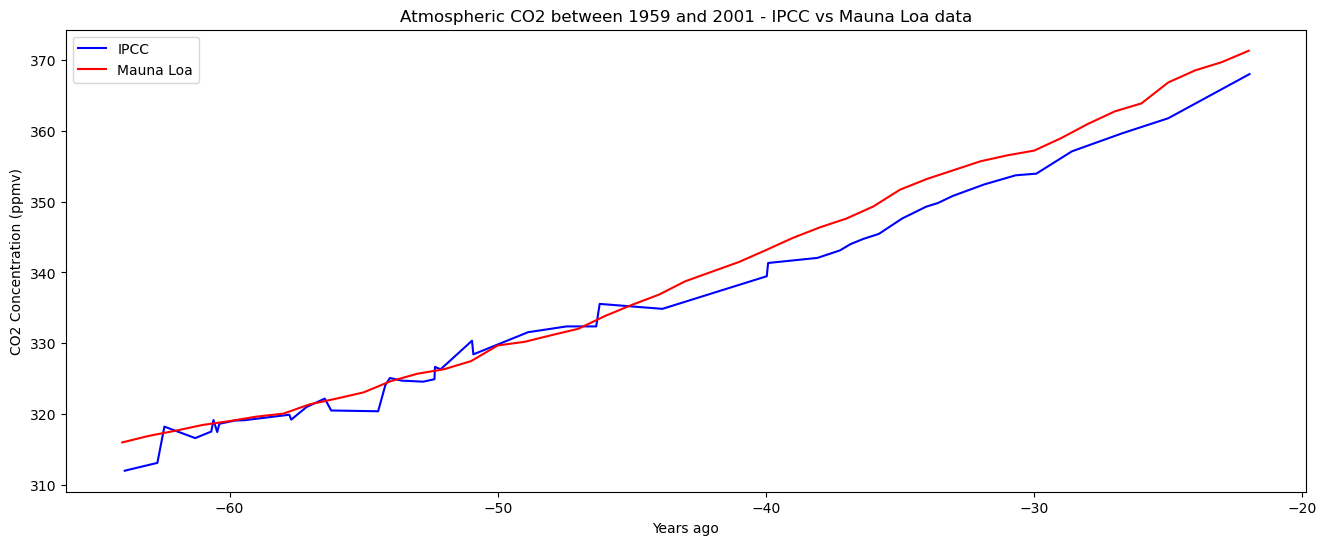

<Figure size 640x480 with 0 Axes>

In [55]:
plt.figure(figsize= (16,6))

sns.lineplot(x='Years', y='CO2', data=df_co2_ipcc_1959_to_2001, color = 'blue', label='IPCC')
sns.lineplot(x='Years', y='CO2', data=df_mauna_loa_1959_to_2001, color = 'red', label='Mauna Loa')

plt.title('Atmospheric CO2 between 1959 and 2001 - IPCC vs Mauna Loa data')
plt.xlabel('Years ago')
plt.ylabel('CO2 Concentration (ppmv)')

plt.legend()

plt.show()

plt.savefig('co2_ipcc_vs_mauna_loa.png')

It should be noted that the IPCC data relates to CO2 levels inferred from high resolution ice cores in the Law Dome in East Antarctica while the Mauna Loa data comes from the summit of Mauna Loa in Hawaii, using a sophisticated analyser tool. Nevertheless, we can see that the data for CO2 concentration during the overlapping period of the IPCC and Mauna Loa datasets is in agreement.

#### Combining IPCC and Mauna Loa Carbon Dioxide datasets ####

I will now combine the IPCC data with the Mauna Loa data to create a new dataframe containing data for carbon dioxide levels from 805,741 years ago to today:

In [56]:
# First I will create a sub-dataframe from the Mauna Loa containing CO2 data relating to 2002 onwards
df_post_2001_mauna_loa = df_mauna_loa_csv.loc[df_mauna_loa_csv['Years'] > -22 ]

# creating a new dataframe from the Mauna Loa data, containing only the two columns of interest 'CO2' and 'Years'.
# To avoid getting a warning for 'chained indexing', I followed the syntax as found in this link : 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
df_post_2001_mauna_loa_trimmed = df_post_2001_mauna_loa.loc[:, ('Years', 'CO2')]

# I am converting the figures in the years columns to float to avoid getting a warning message when I combine the 'Years' data
# from the Mauna Loa data (which is in integer format) with the 'Years' data from the IPCC dataset, which is in float format
df_post_2001_mauna_loa_trimmed['Years'] = df_post_2001_mauna_loa_trimmed['Years'].astype(float)

#print(df_post_2001_mauna_loa_trimmed)

# creating a new dataframe from the IPCC data, containing only the two columns of interest 'CO2' and 'Years'
df_co2_ipcc_trimmed = df_co2_ipcc.loc[:, ('Years', 'CO2')]

#print(df_co2_ipcc_trimmed)

# Here I am merging the trimmed dataframes for the IPCC data and post-2001 Mauna Loa data 
df_co2 = pd.merge(df_co2_ipcc_trimmed, df_post_2001_mauna_loa_trimmed, on = 'Years', how = 'outer')

# The merge produces two columns: 'C02_x' relating to the IPCC data and 'CO2_y' relating to the Manua Loa data.
# Here I am merging these two columns using the combine_first method: this creates a new column where missing/ NaN values
# from one column are replaced with the corresponding non-null value from the other column

df_co2['CO2'] = df_co2['CO2_x'].combine_first(df_co2['CO2_y'])

# Here I am dropping the unwanted columns CO2_x and CO2_y. the axis = 1 parameter is used to specify that it is a column being
# dropped as opposed to a row
df_co2 = df_co2.drop(['CO2_x', 'CO2_y'], axis = 1)

print(df_co2)

          Years     CO2
0    -805741.87  207.29
1    -805205.44  202.23
2    -804595.67  204.86
3    -804082.87  207.50
4    -803998.28  202.92
...         ...     ...
1917      -5.00  408.72
1918      -4.00  411.65
1919      -3.00  414.21
1920      -2.00  416.41
1921      -1.00  418.53

[1922 rows x 2 columns]


Next, I will plot this composite carbon dioxide dataset to show how the most recent figures for carbon dioxide levels compare with the long-term historical average:

<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years'}, xlabel='Years', ylabel='CO2'>

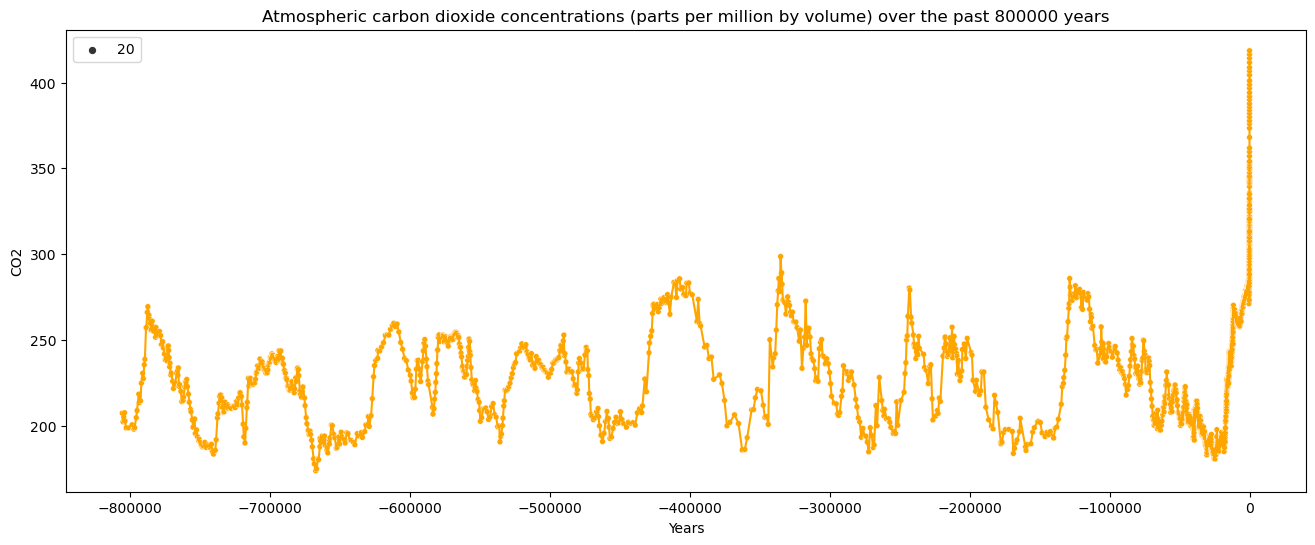

In [57]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years')

sns.scatterplot(x ='Years', y ='CO2', data=df_co2, color ='orange', size = 20)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x = 'Years', y = 'CO2', data = df_co2, color = 'orange')

We can see clearly that atmospheric carbon dioxide levels have risen greatly in a very short period of time to reach levels significantly higher than the levels which prevailed for the past 800000 years.

### CO2 versus Temperature Anomoly ###

To compare CO2 levels for the past 820000 years with the temperature anomaly, I will need to obtain a dataset for the temperature anomaly covering this whole timespan. We can use data from the NOAA for the Antarctic air temperature anomaly for the period from 1850 to now. This record compares the temperature for each year to the average temperature of the base period 1910 to 2000. 

For earlier data, I will calculate the temperature anomaly as follows:
I will take the average temperature for the period 1000 AD to 1845 AD from the Jouzel dataset, calculated based on the number of data points for temperature during this timespan; I am choosing 1845 AD since this is the most recent figure for temperature given in the Jouzel dataset which doesn't have a counterpart datapoint in the NOAA data. The reason I am using almost 1000 years of data as a base period is that this is the base period used in the earlier Jouzel dataset (found on the text file here: https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt). I wasn't able to easily extract this temperature anomaly data from the text file so I decided to calculate it myself based on the newer dataset (saved in my working directory as a csv file).

Since 1845 is a relatively early date before humanity began to release large amounts of carbon dioxide into the atmosphere, it seems acceptable to me to compare the temperature in 1845 to the pre-industrial temperatures of earlier times. 

I will then create a dataframe containing the temperature anomaly going back to 820000 years ago, right up to the present day. I will plot these figures against the figures for CO2 obtained above.

In [69]:
# First I will create a sub-dataframe from the Jouzel dataset containing temperature data relating to 1845 backwards
df_pre_1845_jouzel = df_temp_jouzel_csv.loc[df_temp_jouzel_csv['Years'] < -177 ]

# creating a new dataframe from the Jouzel sub-dataframe, containing only the two columns of interest 'Years' and 'temp_Kelvin'
# To avoid getting a warning for 'chained indexing', I followed the syntax as found in this link : 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
df_pre_1845_jouzel_trimmed = df_pre_1845_jouzel.loc[:, ('Years', 'temp_Kelvin')]

# I am converting the figures in the years columns to float to avoid getting a warning messages if I combine data relating to
# years from different datasets
df_pre_1845_jouzel_trimmed['Years'] = df_pre_1845_jouzel_trimmed['Years'].astype(float)

# to calculate the average temperature between 1000 AD and 1845 AD, we only take rows relating to 1013 years ago and onwards
df_1000_to_1845_jouzel = df_pre_1845_jouzel_trimmed.loc[df_pre_1845_jouzel_trimmed['Years'] > - 1013]

mean_temp_1000_to_1845 = df_1000_to_1845_jouzel['temp_Kelvin'].mean()
round_mean_temp_1000_to_1845 = round(mean_temp_1000_to_1845, 2)
print(f"The mean Antarctic air temperature between 1000 AD and 1845 AD is estimated to be {round_mean_temp_1000_to_1845} Kelvin \n")

# Next I want to calculate the temperature anomoly for each year in the Jouzel dataset using this base period temperature of 217.18 kelvin:
df_pre_1845_jouzel_trimmed['anomaly'] = df_pre_1845_jouzel_trimmed['temp_Kelvin'] - 217.18
print("The temperature anomaly in degrees compared with the average for the period 1000 to 1845 is as follows: \n ")
print(df_pre_1845_jouzel_trimmed)

# Next I want to combine this pre 1845 temperature anomaly data with the post 1850 darta from the NOAA:
# Firstly I will ensure the data for 'Years' in the NOAA daaset is in float format, to avoid getting a warning
# for trying to merge floats and ints in the same column
df_antarctic_temp_anomaly_1850['Years'] = df_antarctic_temp_anomaly_1850['Years'].astype(float)

df_temp_anomaly = pd.merge(df_pre_1845_jouzel_trimmed, df_antarctic_temp_anomaly_1850, on = 'Years', how = 'outer')

# The merge produces two anomaly columns: 'anomaly_x' relating to the Jouzel data and 'anomaly_y' relating to the NOAA data.
# Below I am merging these two columns using the combine_first method: this creates a new column where missing/ NaN values
# from one column are replaced with the corresponding non-null value from the other column

df_temp_anomaly['anomaly'] = df_temp_anomaly['anomaly_x'].combine_first(df_temp_anomaly['anomaly_y'])

# Next I am dropping the unwanted columns 'anomaly_x', 'anomaly_y', 'year' and 'temp_Kelvin'. This gives us
# a dataframe containing only years and the temperature anomly for each year in degrees (Celsius or Kelvin).
# The axis = 1 parameter is used to specify that it is a column being dropped as opposed to a row
df_temp_anomaly = df_temp_anomaly.drop(['anomaly_x', 'anomaly_y', 'year', 'temp_Kelvin'], axis = 1)
                                    
print(df_temp_anomaly)

The mean Antarctic air temperature between 1000 AD and 1845 AD is estimated to be 217.18 Kelvin 

The temperature anomaly in degrees compared with the average for the period 1000 to 1845 is as follows: 
 
              Years  temp_Kelvin  anomaly
5818 -821911.000000        211.4    -5.78
5817 -820842.000000        211.4    -5.78
5816 -819773.000000        211.3    -5.88
5815 -818704.000000        211.2    -5.98
5814 -817635.000000        211.0    -6.18
...             ...          ...      ...
24      -218.000000        217.0    -0.18
23      -207.836667        217.8     0.62
22      -197.673333        216.3    -0.88
21      -187.510000        216.8    -0.38
20      -177.686667        218.2     1.02

[5799 rows x 3 columns]
         Years  anomaly
0    -821911.0    -5.78
1    -820842.0    -5.78
2    -819773.0    -5.88
3    -818704.0    -5.98
4    -817635.0    -6.18
...        ...      ...
5967      -5.0     0.41
5968      -4.0     0.34
5969      -3.0     0.35
5970      -2.0     0.00
59

#### CO2 versus temperature anomaly ####

We can now plot the composite dataset for CO2 levels against the composite dataset for the temperature anomoly, over approximately 820000 years:

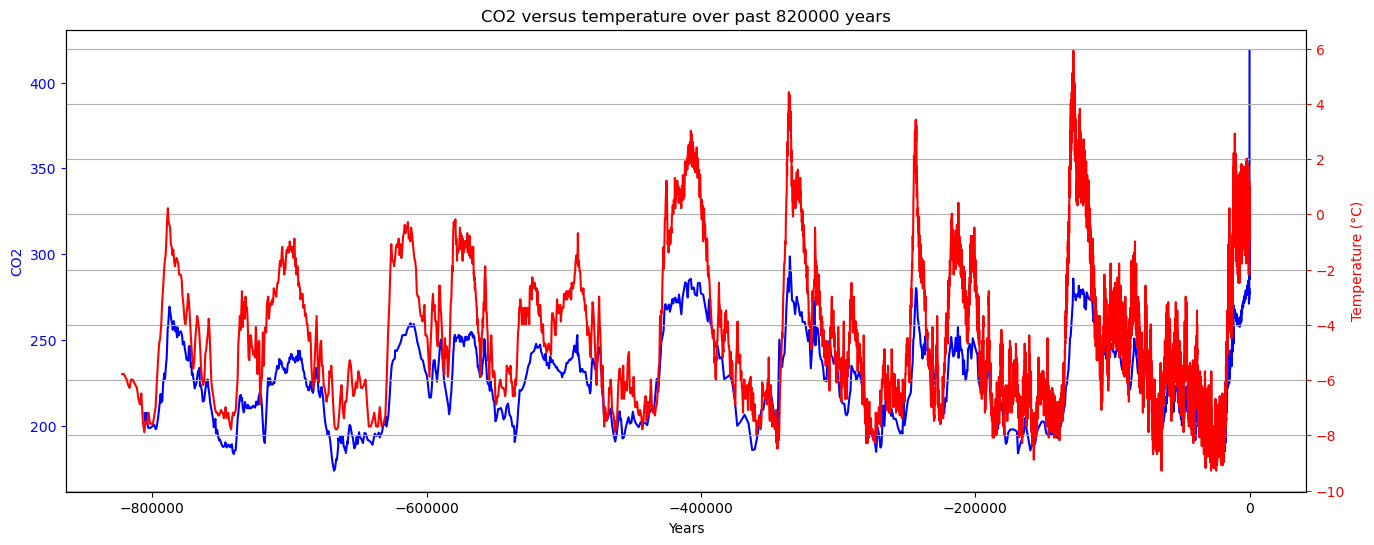

In [72]:
# This creates a plot capable of displaying more than one subplot
# https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/#:~:text=It%20uses%20ax.,Y%20axis%20on%20this%20twin.
# Below is an alteration of some code I used in Project 1 for the Programming for Data Analysis module of my HDip in
# Data Analytics https://github.com/jmce22/pfda_project1 
# In that project I created a graph with two y-axes but with the y-axes data measured against the same x-axis

fig, ax1 = plt.subplots(figsize=(16, 6))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for CO2 on the primary y-axis
ax1.plot(df_co2['Years'], df_co2['CO2'], color='blue', label='CO2')
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params(axis='y', colors='blue')   

# Plot for temperature on secondary y-axis
ax2.plot(df_temp_anomaly['Years'], df_temp_anomaly['anomaly'], color='red', label='Temperature')
ax2.set_ylabel('Temperature (°C)', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('CO2 versus temperature over the past 820000 years') 
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.savefig('CO2_vs_temp')
plt.show()

It seems to be the case that over the past 820000 years, the temperature anomoly was associated with the level of CO2 in the atmosphere, as local peaks in the data for CO2 tend to occur during the same periods as local peaks in the air temperature data. 

To compare the data for the Antarctic temperature anomaly from 1850 with the figures for CO2 from 1850, I can create a sub-dataframe for the CO2 for 1850 to 2022 and plot it in the same way I plotted the full datasets; by doing this, we can investigate the temperature anomoly as it relates to recent increases in CO2 levels in the atmosphere. It should be borne in mind that the figures for temperature anomoly for 1850 onwards are calculated based on a the average Antarctic air temperature for the period 1910 to 2000.


In [81]:
df_co2_post_1850 = df_co2.loc[df_co2['Years'] > -174]
print(df_co2_post_1850)

# I will also create a sub-frame from the composite temperature anomaly dataset to include only years from 1850 onwards,
# as I want to use the 'Years' column which has a standardised format for measuring time
df_temp_anomaly_post_1850 = df_temp_anomaly.loc[df_temp_anomaly['Years'] > -174]
print(df_temp_anomaly_post_1850)

       Years     CO2
1746 -172.74  284.00
1747 -172.17  288.79
1748 -171.89  285.47
1749 -169.29  288.05
1750 -168.28  285.57
...      ...     ...
1917   -5.00  408.72
1918   -4.00  411.65
1919   -3.00  414.21
1920   -2.00  416.41
1921   -1.00  418.53

[176 rows x 2 columns]
      Years  anomaly
5799 -173.0    -0.08
5800 -172.0    -0.10
5801 -171.0    -0.05
5802 -170.0    -0.08
5803 -169.0    -0.08
...     ...      ...
5967   -5.0     0.41
5968   -4.0     0.34
5969   -3.0     0.35
5970   -2.0     0.00
5971   -1.0     0.38

[173 rows x 2 columns]


We can plot this CO2 data against the temperature anomaly data for the same time range:

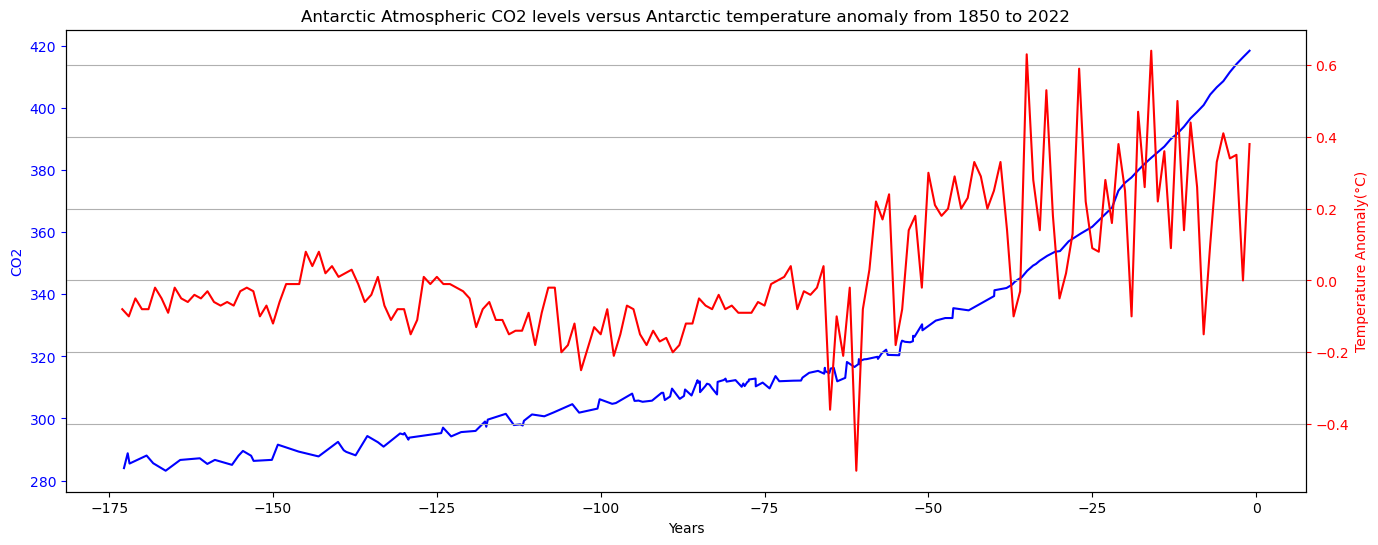

In [83]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# This creates a second y-axis which shares the same x-axis as the first y-axis
ax2 = ax1.twinx()

# Plot for CO2 on the primary y-axis
ax1.plot(df_co2_post_1850['Years'], df_co2_post_1850['CO2'], color='blue', label='CO2')
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2', color='blue')
ax1.tick_params(axis='y', colors='blue')   

# Plot for temperature anomaly on secondary y-axis. 
ax2.plot(df_temp_anomaly_post_1850['Years'], df_antarctic_temp_anomaly_1850['anomaly'], color='red', label='Temperature')
ax2.set_ylabel('Temperature Anomaly(°C)', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('Antarctic Atmospheric CO2 levels versus Antarctic temperature anomaly from 1850 to 2022') 
plt.grid(True)    # This plots a grid which makes it easier to compare both sets of data
plt.savefig('CO2_vs_temp_anomaly')
plt.show()

When we plot these two variables together, we can see that the data can be divided into two sections:

- The data from 1850 to 1950 shows that temperature didn't fluctuate greatly and was typically lower than the average for 1910 to 2000 as a whole. Carbon dioxide levels also didn't increase hugely over this time period relative to the increases which come after that point (levels increased from around 286 ppm to 313 ppm between 1850 and 1950 according to the IPCC data: an increase of around 9.4% over a century)

- The data from 1950 to 2022 shows that temperatures fluctuated a lot more compared to the average for 1910 to 2000 and that for most of the period since around 1965, average temperature at the Antarctic has been higher than this base figure. One interesting point I notice is that the temperature anomaly reached levels of over 0.5 degrees above baseline during four years from 1988 to 2007, but only surpassed 0.4 degrees above baseline twice since 2007. 

A manual investigation of the IPCC dataset shows that it took around **53 years** (from 1912 to 1965) for CO2 levels to go from 300 to 320 ppm. According to the Mauna Loa dataset, it then took only **16 years** to increase to 340 ppm (in 1981), **14 years** to reach 360 ppm (in 1995), **10 years** to reach 380 ppm (in 2005) and **10 years** to reach 400 ppm in 2015. The most recent figures for the year 2022 are 418 ppm.

### CH4 versus Temperature Anomoly ###

### Climate change signals in the Irish context ###

### Fusion of datasets ###

### Prediction of Global Temperature Anomoly ###

### Accelerating increases of temperature ###

### Summary ###

### References ###